# Iris Species Segmentation with K-Means Cluster Analysis

The Iris flower dataset is one of the most popular datasets in machine learning. Link: https://en.wikipedia.org/wiki/Iris_flower_data_set

It has 4 major features: sepal length, sepal width, petal length and petal width.

In the following notebook, we will segment the Iris dataset into different species using K-means clusters and try to determine the optimal k-cluster solution. We will then compare our results with those in the <code>iris-with-answers.csv</code> file.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [3]:
# Load the data

data = pd.read_csv('iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


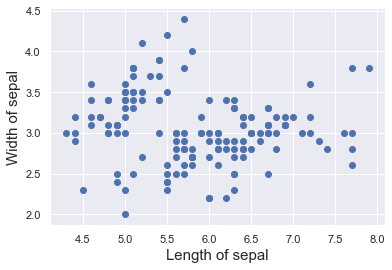

In [4]:
# We plot the data to initially view the clusters

plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Length of sepal', fontsize=15)
plt.ylabel('Width of sepal', fontsize=15)
plt.show()

#### Clustering

In [5]:
#Unscaled Data

x = data.copy()
kmeans = KMeans(2) # Let's try 2 clusters first
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
clusters = data.copy()
clusters['clusters_pred']=kmeans.fit_predict(x) # cluster prediction for each observation

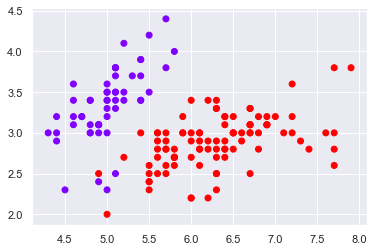

In [10]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c = clusters['clusters_pred'], cmap='rainbow')

In [11]:
# Standardization

from sklearn import preprocessing

x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [12]:
#Clustering with standardized data
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### WCSS

In [15]:
wcss = []
#cl_num keeps track of the highest number of clusters we want to use WCSS for.
cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.61353859563565,
 91.03803732532629,
 80.48982145270772,
 70.93964372756813,
 63.056244057155496,
 55.46342262013704]

Text(0, 0.5, 'WCSS')

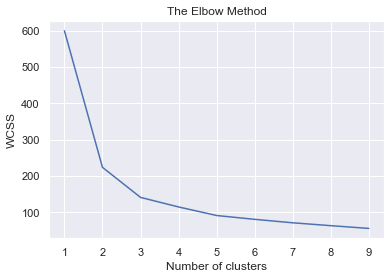

In [16]:
#Plotting wcss results to utilize Elbow Method and determine the required number of clusters
clusters_num =  range(1,cl_num)
plt.plot(clusters_num, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

We will now create multiple scatter-plots of clustering with different values of k. We will use k=2,3 and 5 as per the elbows observed in the above graph.

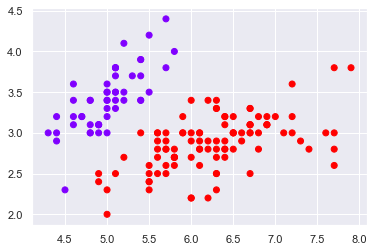

In [17]:
# k=2

kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c=clusters_2['cluster_pred'], cmap='rainbow')

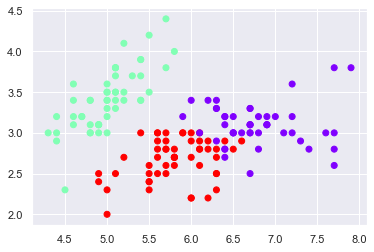

In [18]:
# k=3

kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c=clusters_3['cluster_pred'], cmap='rainbow')

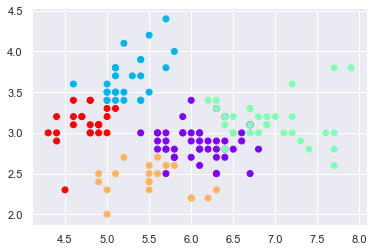

In [19]:
# k=5

kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c=clusters_5['cluster_pred'], cmap='rainbow')

#### Comparison with real data

In [22]:
# Read and map original iris dataset

real_data = pd.read_csv('iris-with-answers.csv')
real_data['species'].unique()
real_data['species'] = real_data['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


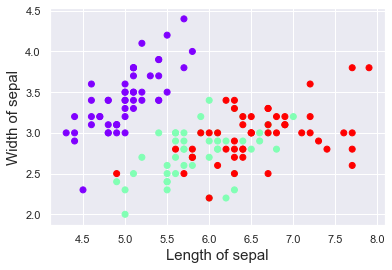

In [21]:
# Scatter plots for real data (sepals)

plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c = real_data['species'], cmap ='rainbow')
plt.xlabel('Length of sepal', fontsize=15)
plt.ylabel('Width of sepal', fontsize=15)
plt.show()

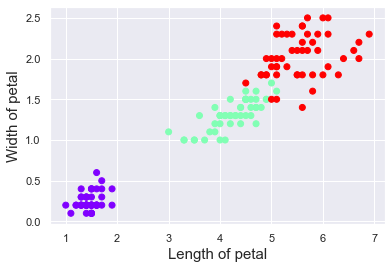

In [23]:
# Scatter plots for real data (petals)

plt.scatter(real_data['petal_length'], real_data['petal_width'], c = real_data['species'], cmap ='rainbow')
plt.xlabel('Length of petal', fontsize=15)
plt.ylabel('Width of petal', fontsize=15)
plt.show()

#### Our clustering algorithm

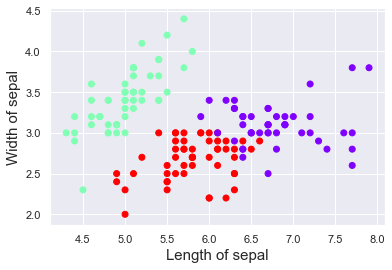

In [26]:
# Scatter plots for our data (sepals)

plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c = clusters_3['cluster_pred'], cmap ='rainbow')
plt.xlabel('Length of sepal', fontsize=15)
plt.ylabel('Width of sepal', fontsize=15)
plt.show()

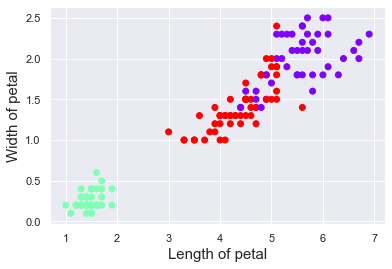

In [27]:
# Scatter plots for our data (petals)

plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c = clusters_3['cluster_pred'], cmap ='rainbow')
plt.xlabel('Length of petal', fontsize=15)
plt.ylabel('Width of petal', fontsize=15)
plt.show()

We observe from the original dataset that the real number of clusters is 3. So, the other two potential alternative as per the elbow method i.e. 2 and 5, are incorrect. Furthermore, we can deduce that k-means is not the ideal method for this sort of task as: 
1. the number of biological classifications are best-suited for a hierarchical clustering method such as Ward's method.
2. the number of clusters is not known.